In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
url = 'https://raw.githubusercontent.com/fenago/datasets/main/protein.csv'
df = pd.read_csv(url)

In [3]:
df.head(10)

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0
5,Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4
6,E Germany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6
7,Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4
8,France,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5
9,Greece,10.2,3.0,2.8,17.6,5.9,41.7,2.2,7.8,6.5


In [4]:
x = df.iloc[:,1:]

In [5]:
mat = x.corr()
print(mat)

            RedMeat  WhiteMeat      Eggs      Milk      Fish   Cereals  \
RedMeat    1.000000   0.153003  0.585609  0.502931  0.060957 -0.499877   
WhiteMeat  0.153003   1.000000  0.620409  0.281484 -0.234009 -0.413797   
Eggs       0.585609   0.620409  1.000000  0.575533  0.065571 -0.712437   
Milk       0.502931   0.281484  0.575533  1.000000  0.137884 -0.592737   
Fish       0.060957  -0.234009  0.065571  0.137884  1.000000 -0.524231   
Cereals   -0.499877  -0.413797 -0.712437 -0.592737 -0.524231  1.000000   
Starch     0.135426   0.313772  0.452231  0.222411  0.403853 -0.533262   
Nuts      -0.349449  -0.634962 -0.559781 -0.621087 -0.147153  0.650997   
Fr&Veg    -0.074221  -0.061317 -0.045518 -0.408364  0.266139  0.046548   

             Starch      Nuts    Fr&Veg  
RedMeat    0.135426 -0.349449 -0.074221  
WhiteMeat  0.313772 -0.634962 -0.061317  
Eggs       0.452231 -0.559781 -0.045518  
Milk       0.222411 -0.621087 -0.408364  
Fish       0.403853 -0.147153  0.266139  
Cereals

<Axes: >

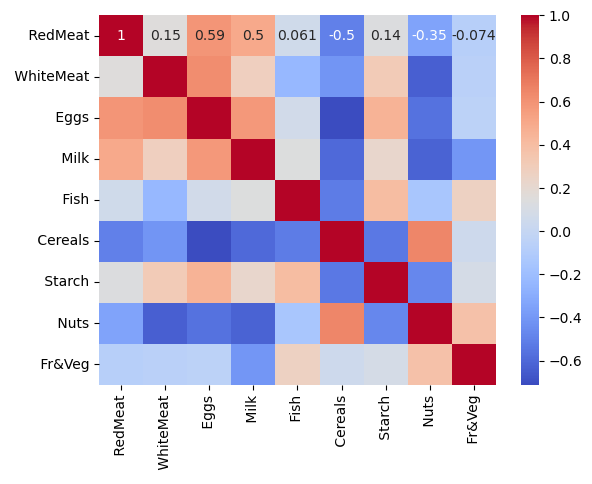

In [6]:
sns.heatmap(mat,annot = True,cmap = 'coolwarm')

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA()

In [11]:
pcafood = pca.fit(scaled_x)

In [12]:
pcafood

PCA()

In [13]:
foodpc = pca.transform(scaled_x)

In [14]:
foodpc

array([[ 3.55723814e+00, -1.66410153e+00,  1.79755117e+00,
         2.34393720e-01,  2.37334793e-02, -1.05559205e+00,
        -4.81469628e-01, -7.77255003e-01,  1.05382405e-01],
       [-1.45200587e+00, -1.06270224e+00, -1.36539039e+00,
         1.71563620e-01, -9.52694928e-01,  2.22932247e-01,
        -1.84889698e-01,  2.56178342e-01,  2.21930212e-01],
       [-1.65547983e+00,  1.62784489e-01, -2.20999548e-01,
         5.31463788e-01,  7.70660901e-01, -2.95781090e-01,
        -1.99630084e-01,  2.07504199e-01,  3.38554796e-02],
       [ 3.19870836e+00, -1.32789455e+00, -1.54409266e-01,
         2.18606147e-01, -4.94741169e-01, -7.09921249e-01,
         4.74366591e-01,  8.24911254e-01,  3.06046263e-01],
       [-3.78103882e-01, -6.15095879e-01, -1.22060302e+00,
        -4.73549701e-01,  2.62119692e-01, -8.40063194e-01,
         3.21442872e-01, -1.25516833e-02,  1.52529985e-01],
       [-2.41404237e+00,  2.91331924e-01,  7.67775590e-01,
        -9.87288484e-01, -7.67948816e-01, -1.738419

In [16]:
pcafood.n_components_

9

In [17]:
# Converting the principal components data into a DataFrame
pc_columns = [f'PC{i+1}' for i in range(pcafood.n_components_)]
foodpcdf = pd.DataFrame(data=foodpc,columns=pc_columns,index = df['Country'])

In [18]:
foodpcdf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Country,,,,,,,,,
Albania,3.557238,-1.664102,1.797551,0.234394,0.023733,-1.055592,-0.481470,-0.777255,0.105382
Austria,-1.452006,-1.062702,-1.365390,0.171564,-0.952695,0.222932,-0.184890,0.256178,0.221930
Belgium,-1.655480,0.162784,-0.221000,0.531464,0.770661,-0.295781,-0.199630,0.207504,0.033855
Bulgaria,3.198708,-1.327895,-0.154409,0.218606,-0.494741,-0.709921,0.474367,0.824911,0.306046
Czechoslovakia,-0.378104,-0.615096,-1.220603,-0.473550,0.262120,-0.840063,0.321443,-0.012552,0.152530
Denmark,-2.414042,0.291332,0.767776,-0.987288,-0.767949,-0.173842,-0.230472,0.633827,-0.490183
E Germany,-1.451538,0.459586,-1.329399,-1.159386,0.431664,-0.661681,-0.566223,0.166542,0.265261
Finland,-1.596104,-0.608293,2.091770,-1.444493,0.037970,0.851402,0.741206,-0.230576,0.135834
France,-1.518666,0.801560,-0.001921,1.997822,0.255623,-0.917485,0.965992,0.022678,-0.554817


In [23]:
foodpc.min()/10

-0.27184003690313757

In [24]:
foodpc.max()/10

0.4377374927298712

In [27]:
pca.components_.T

array([[-0.30260939, -0.05625165,  0.29757957,  0.64647654,  0.32216008,
        -0.45986989,  0.15033385,  0.0198577 , -0.24599953],
       [-0.31055622, -0.23685334, -0.62389724, -0.03699227, -0.30016494,
        -0.12100707, -0.01966356,  0.02787648, -0.59239656],
       [-0.42667851, -0.03533576, -0.18152828,  0.31316387,  0.07911048,
         0.36124872, -0.44327151,  0.49120023,  0.33338613],
       [-0.37772728, -0.18458877,  0.38565773, -0.00331828, -0.20041361,
         0.6184378 ,  0.462095  , -0.08142193, -0.17808411],
       [-0.1356499 ,  0.6468197 ,  0.32127431, -0.215955  , -0.29003065,
        -0.13679059, -0.1063935 ,  0.44873197, -0.31282621],
       [ 0.43774343, -0.23348508, -0.0959175 , -0.00620412,  0.23816783,
         0.08075842,  0.40496408,  0.70299504, -0.15225956],
       [-0.29724767,  0.35282564, -0.24297503, -0.33668473,  0.73597332,
         0.1476667 ,  0.15275311, -0.11453956, -0.12185817],
       [ 0.4203344 ,  0.14331056,  0.05438778,  0.33028754,  0

In [28]:
pca.components_

array([[-0.30260939, -0.31055622, -0.42667851, -0.37772728, -0.1356499 ,
         0.43774343, -0.29724767,  0.4203344 ,  0.11041989],
       [-0.05625165, -0.23685334, -0.03533576, -0.18458877,  0.6468197 ,
        -0.23348508,  0.35282564,  0.14331056,  0.53619004],
       [ 0.29757957, -0.62389724, -0.18152828,  0.38565773,  0.32127431,
        -0.0959175 , -0.24297503,  0.05438778, -0.40755612],
       [ 0.64647654, -0.03699227,  0.31316387, -0.00331828, -0.215955  ,
        -0.00620412, -0.33668473,  0.33028754,  0.46205575],
       [ 0.32216008, -0.30016494,  0.07911048, -0.20041361, -0.29003065,
         0.23816783,  0.73597332,  0.15053689, -0.23351666],
       [-0.45986989, -0.12100707,  0.36124872,  0.6184378 , -0.13679059,
         0.08075842,  0.1476667 ,  0.44701001,  0.11854972],
       [ 0.15033385, -0.01966356, -0.44327151,  0.462095  , -0.1063935 ,
         0.40496408,  0.15275311, -0.40726235,  0.44997782],
       [ 0.0198577 ,  0.02787648,  0.49120023, -0.08142193,  0

In [29]:
pca.explained_variance_

array([4.17337247, 1.70312442, 1.17491615, 0.99444163, 0.483165  ,
       0.3386781 , 0.28292327, 0.1211374 , 0.10324157])

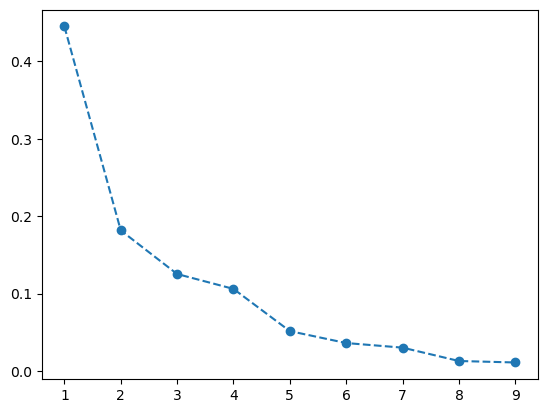

In [40]:
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
#plt.plot([0,4],[8,8],'r')

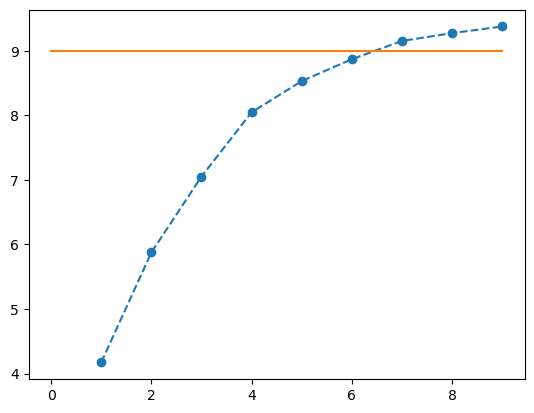

In [67]:
plt.plot(np.arange(1, len(cumex)+1), cumex, marker='o', linestyle='--')
plt.plot([0,9],[9,9])

In [45]:
pca.explained_variance_

array([4.17337247, 1.70312442, 1.17491615, 0.99444163, 0.483165  ,
       0.3386781 , 0.28292327, 0.1211374 , 0.10324157])

In [46]:
np.cumsum(pca.explained_variance_)

array([4.17337247, 5.8764969 , 7.05141305, 8.04585468, 8.52901967,
       8.86769777, 9.15062103, 9.27175843, 9.375     ])

In [51]:
(np.cumsum(pca.explained_variance_) + 1)

array([ 5.17337247,  6.8764969 ,  8.05141305,  9.04585468,  9.52901967,
        9.86769777, 10.15062103, 10.27175843, 10.375     ])

In [54]:
cumex = np.cumsum(pca.explained_variance_)

In [58]:
import numpy as np
import pandas as pd
from scipy.stats import zscore

# Example data
data = {
    'Feature1': [10, 20, 30, 40, 50],
    'Feature2': [5, 10, 15, 20, 25],
    'Feature3': [1, 2, 3, 4, 5]
}

df = pd.DataFrame(data)

# Calculate z-scores
z_scores = df.apply(zscore)

print(z_scores)


   Feature1  Feature2  Feature3
0 -1.414214 -1.414214 -1.414214
1 -0.707107 -0.707107 -0.707107
2  0.000000  0.000000  0.000000
3  0.707107  0.707107  0.707107
4  1.414214  1.414214  1.414214


In [63]:
df

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0
5,Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4
6,E Germany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6
7,Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4
8,France,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5
9,Greece,10.2,3.0,2.8,17.6,5.9,41.7,2.2,7.8,6.5


In [64]:
pc = PCA(n_components=0.95)

In [65]:
mod = pc.fit(scaled_x)

In [66]:
mod.n_components_

7

In [68]:
mod.explained_variance_

array([4.17337247, 1.70312442, 1.17491615, 0.99444163, 0.483165  ,
       0.3386781 , 0.28292327])

In [69]:
mod.explained_variance_ratio_

array([0.44515973, 0.18166661, 0.12532439, 0.10607377, 0.0515376 ,
       0.03612566, 0.03017848])

In [72]:
foodpc.var()

0.9999999999999998